In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_sea = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects/'
                                        'SustainableEnergyAndHealth/data/'
                                        'Sustainable_Energy_for_All_Transformed.csv',
                     header=0,
                     na_values=['..'])
df_esg = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Environment_Social_and_Governance_(ESG)_Data.csv',
                     header=0,
                     na_values=['..'])
df_sdg = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Sustainable_Development_Goals_(SDGs).csv',
                     header=0,
                     na_values=['..'])
df_hnp = pd.read_csv(filepath_or_buffer='/Users/alekivanovski/PycharmProjects'
                                        '/SustainableEnergyAndHealth/data'
                                        '/Health_Nutrition_and_Population_Statistics.csv',
                     header=0,
                     na_values=['..'])

In [4]:
indicators_sea = ["Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]",
                  "Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]",
                  "Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]",
                  "Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]"]

indicators_hnp = ["Smoking prevalence, total, ages 15+",
                  "Survival to age 65, female (% of cohort)",
                  "Survival to age 65, male (% of cohort)"]

In [9]:
df_sea.columns

Index(['Country Name', 'Indicator', '1990.0', '1991.0', '1992.0', '1993.0',
       '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0',
       '2001.0', '2002.0', '2003.0', '2004.0', '2005.0', '2006.0', '2007.0',
       '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0',
       '2015.0', '2016.0'],
      dtype='object')

In [11]:
df_sea = df_sea.drop(columns=['1990.0', '1991.0', '1992.0', '1993.0',
       '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0',
       '2001.0', '2002.0', '2003.0', '2004.0'])

In [14]:
df_sea.columns

Index(['Country Name', 'Indicator', '2005.0', '2006.0', '2007.0', '2008.0',
       '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0',
       '2016.0'],
      dtype='object')

In [65]:
sea_max = []
sea_min = []
for ind in indicators_sea:
    dict = {}
    ind1 = df_sea.loc[df_sea['Indicator'] == ind]
    for row in ind1.itertuples():
        sum = 0
        index = row[0]
        row = row[3:]
        for value in row:
            if not pd.isna(value):
                sum += value
        dict[index] = sum
    indexes_max = sorted(dict, key=dict.get, reverse=True)[:5]
    indexes_min = sorted(dict, key=dict.get, reverse=False)[:5]
    sea_max.append(indexes_max)
    sea_min.append(indexes_min)
    print(ind, "\n")
    print("Max: ", indexes_max)
    print("Min: ", indexes_min)
    print("\n")

Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT] 

Max:  [984, 1131, 973, 980, 1089]
Min:  [961, 962, 964, 982, 986]


Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY] 

Max:  [1233, 1272, 1159, 1213, 1260]
Min:  [1151, 1152, 1154, 1172, 1176]


Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION] 

Max:  [1364, 1404, 1511, 1455, 1353]
Min:  [1335, 1342, 1418, 1442, 1457]


Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC] 

Max:  [1557, 1547, 1575, 1673, 1697]
Min:  [1525, 1532, 1608, 1632, 1647]




In [111]:
hnp_max = []
hnp_min = []
for ind in indicators_hnp:
    dict = {}
    ind1 = df_hnp.loc[df_hnp['Series Name'] == ind]
    for row in ind1.itertuples():
        sum = 0
        index = row[0]
        row = row[5:]
        nulls = 0
        if all(pd.isna(v) for v in row):
            continue
        for value in row:
            if not pd.isna(value):
                sum += value
            else:
                nulls += 1
        dict[index] = sum
    indexes_max = sorted(dict, key=dict.get, reverse=True)[:5]
    indexes_min = sorted(dict, key=dict.get, reverse=False)[:5]
    hnp_max.append(indexes_max)
    hnp_min.append(indexes_min)
    print(ind, "\n")
    print("Max: ", indexes_max)
    print("Min: ", indexes_min)
    print("\n")

Smoking prevalence, total, ages 15+ 

Max:  [2448, 2490, 2420, 2564, 2495]
Min:  [2431, 2418, 2402, 2517, 2502]


Survival to age 65, female (% of cohort) 

Max:  [2730, 2691, 2703, 2806, 2709]
Min:  [2721, 2660, 2629, 2848, 2794]


Survival to age 65, male (% of cohort) 

Max:  [3042, 2952, 2891, 2989, 3076]
Min:  [2980, 2919, 2888, 3107, 3010]




Top 5
Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]


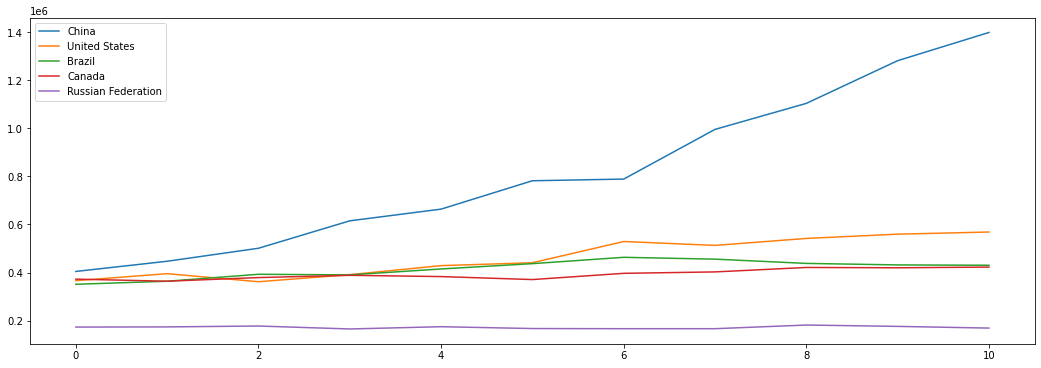

Top 5
Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]


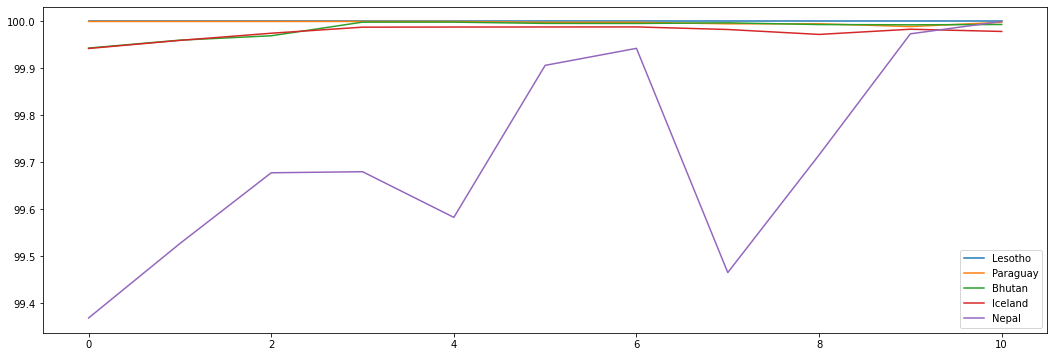

Top 5
Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]


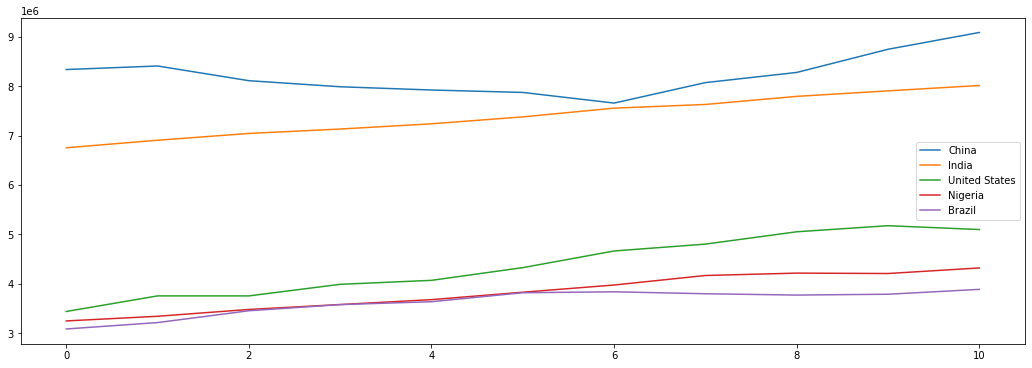

Top 5
Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]


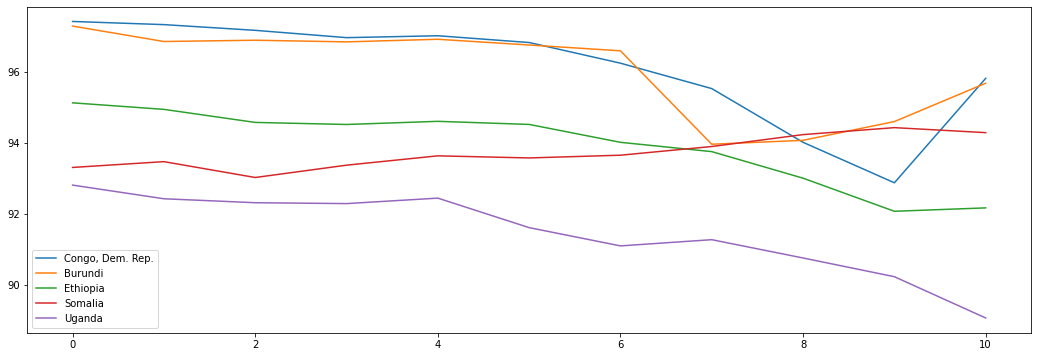

In [89]:
for indicator in sea_max:
    max_sea_ind1 = df_sea.iloc[indicator]
    print("Top 5")
    indicator_name = ""
    for row in max_sea_ind1.itertuples():
        country = row[1]
        indicator_name = row[2]
        row = row[3:]
        tmp = pd.Series([], dtype='float64')
        counter = 0
        for value in row:
            if not pd.isna(value):
                tmp[counter] = value
                counter += 1
        ax = tmp.plot(figsize=[18, 6], label=country)
        ax.legend()
    print(indicator_name)
    plt.show()



Lowest 5
Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]


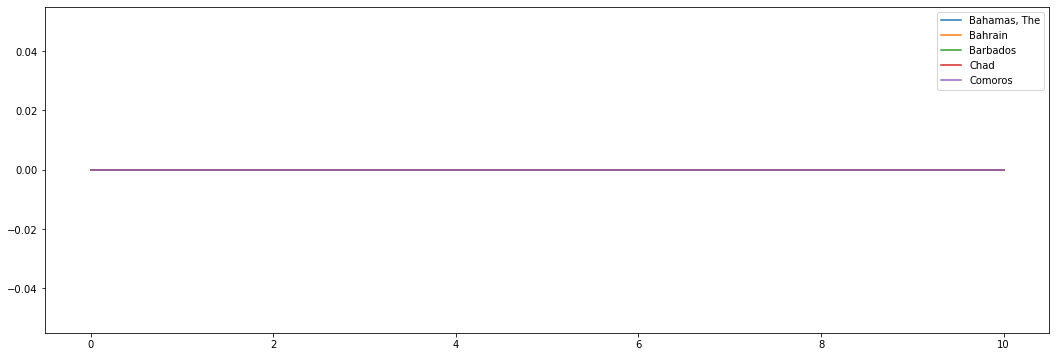

Lowest 5
Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]


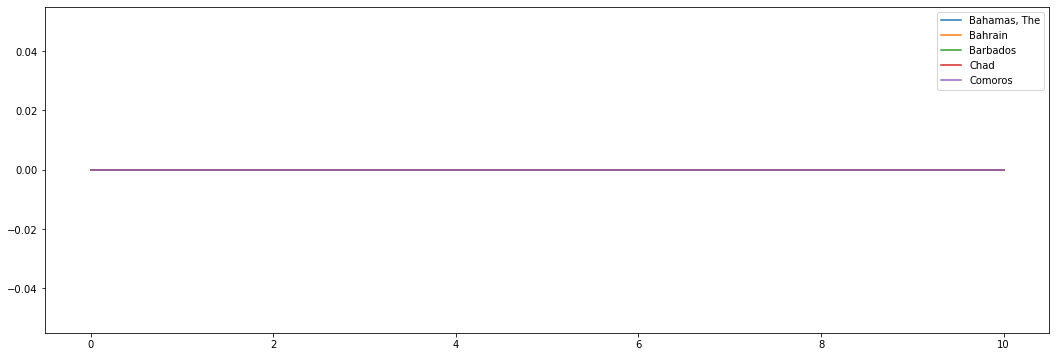

Lowest 5
Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]


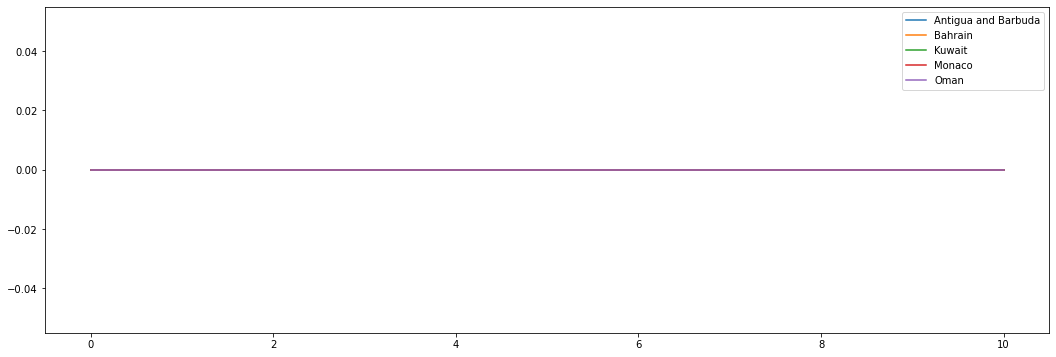

Lowest 5


Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]


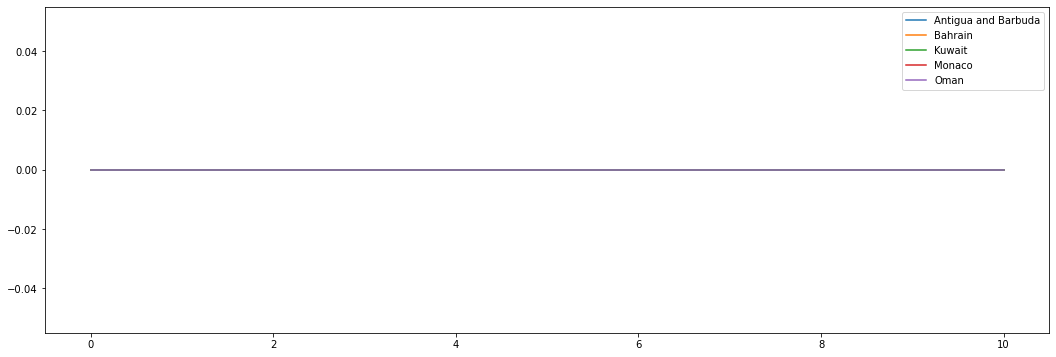

In [95]:
for indicator in sea_min:
    min_sea_ind1 = df_sea.iloc[indicator]
    print("Lowest 5")
    indicator_name = ""
    for row in min_sea_ind1.itertuples():
        country = row[1]
        indicator_name = row[2]
        row = row[3:]
        tmp = pd.Series([], dtype='float64')
        counter = 0
        for value in row:
            if not pd.isna(value):
                tmp[counter] = value
                counter += 1
        ax = tmp.plot(figsize=[18, 6], label=country)
        ax.legend()
    print(indicator_name)
    plt.show()



Top 5
Smoking prevalence, total, ages 15+


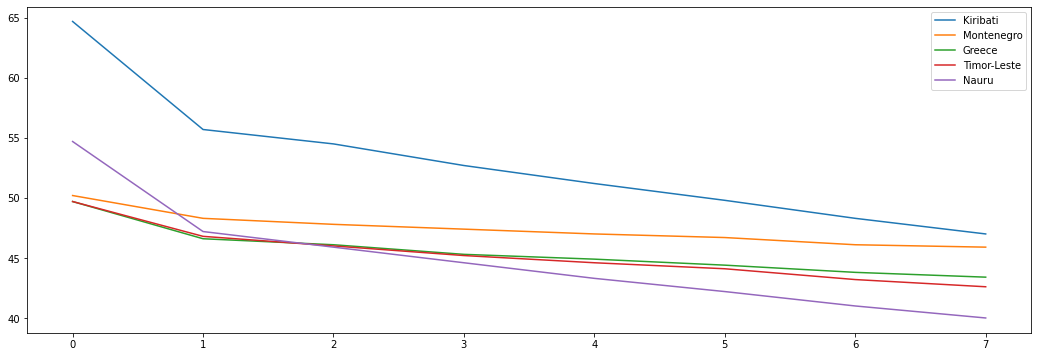

Top 5
Survival to age 65, female (% of cohort)


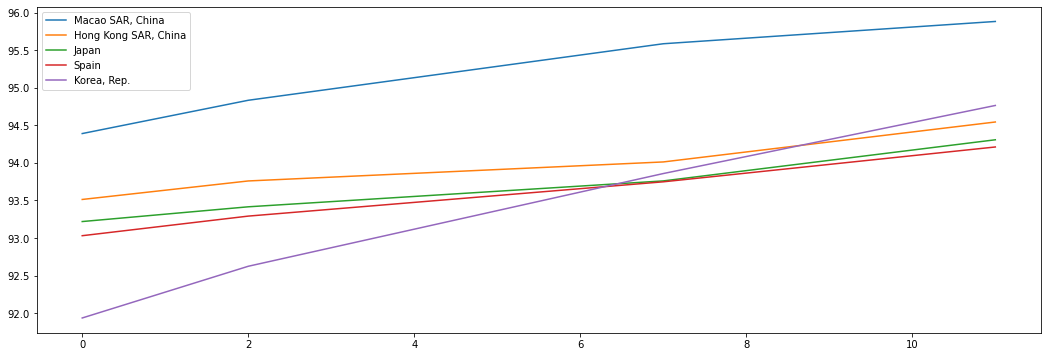

Top 5
Survival to age 65, male (% of cohort)


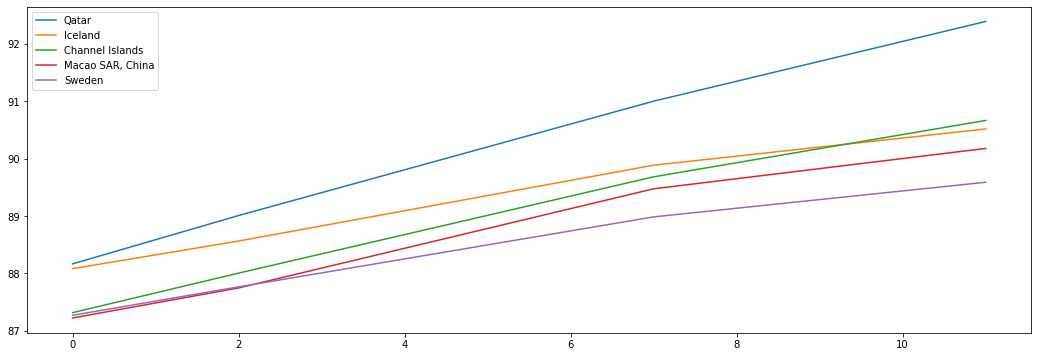

In [107]:
for indicator in hnp_max:
    max_hnp_ind1 = df_hnp.iloc[indicator]
    print("Top 5")
    indicator_name = ""
    for row in max_hnp_ind1.itertuples():
        country = row[3]
        indicator_name = row[1]
        row = row[5:]
        tmp = pd.Series([], dtype='float64')
        counter = 0
        for value in row:
            if not pd.isna(value):
                tmp[counter] = value
                counter += 1
        ax = tmp.plot(figsize=[18, 6], label=country)
        ax.legend()
    print(indicator_name)
    plt.show()

Top 5
Smoking prevalence, total, ages 15+


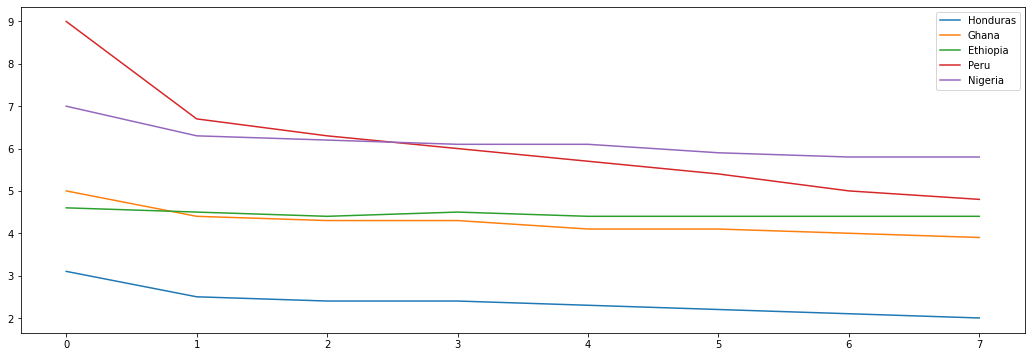

Top 5
Survival to age 65, female (% of cohort)


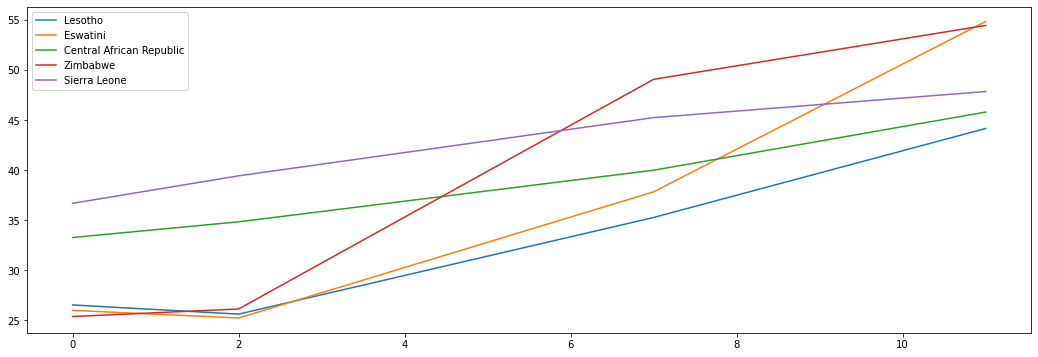

Top 5
Survival to age 65, male (% of cohort)


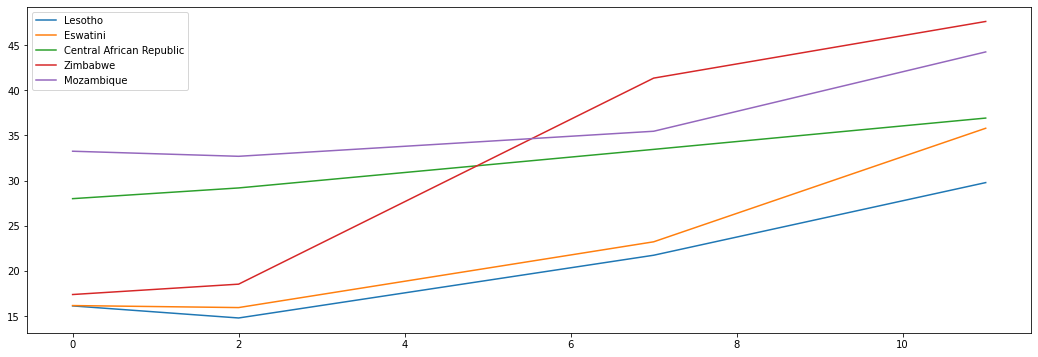

In [112]:
for indicator in hnp_min:
    min_hnp_ind1 = df_hnp.iloc[indicator]
    print("Top 5")
    indicator_name = ""
    for row in min_hnp_ind1.itertuples():
        country = row[3]
        indicator_name = row[1]
        # print(row)
        row = row[5:]
        tmp = pd.Series([], dtype='float64')
        counter = 0
        for value in row:
            if not pd.isna(value):
                tmp[counter] = value
                counter += 1
        ax = tmp.plot(figsize=[18, 6], label=country)
        ax.legend()
    print(indicator_name)
    plt.show()